In [155]:
import pandas  as pd
excel_file_path='datasets/TCP_datasets.xlsx'
df=pd.read_excel(excel_file_path)
df.head(2)

,Perovskite,structure,bandgap,substrate,ETL,ETL-2,ETLthickness,HTL,HTLthickness,electrode,...,Voc,FF,PCE,Article,Cs,FA,MA,Pb,I,Br
0,FA0.45MA0.49Cs0.06PbI1.86Br0.96Cl0.18,1,1.8,FTO,SnO2,NaN,NaN,spiro,NaN,C,...,1.05,0.49,7.2,"Penpong, K., Seriwatanachai, C., Naikaew, A. e...",0.06,0.45,0.49,1.0,1.86,0.96
1,FA0.45MA0.49Cs0.06PbI1.86Br0.96Cl0.18,1,1.8,FTO,SnO2,NaN,NaN,spiro,NaN,C,...,0.96,0.4,5.4,"Penpong, K., Seriwatanachai, C., Naikaew, A. e...",0.06,0.45,0.49,1.0,1.86,0.96


In [156]:
df['bandgap']=df['bandgap'].astype('float64')
df['Voc']=df['Voc'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Perovskite            460 non-null    object 
 1   structure             460 non-null    int64  
 2   bandgap               206 non-null    float64
 3   substrate             444 non-null    object 
 4   ETL                   444 non-null    object 
 5   ETL-2                 231 non-null    object 
 6   ETLthickness          40 non-null     float64
 7   HTL                   432 non-null    object 
 8   HTLthickness          33 non-null     float64
 9   electrode             443 non-null    object 
 10  depositionProcedure   428 non-null    object 
 11  depositionMethod      428 non-null    object 
 12  Anti-solvent          338 non-null    object 
 13  PrecursorSolvent      427 non-null    object 
 14  AnnealingTemperature  422 non-null    float64
 15  AnnealingTime         4

In [157]:
df['bandgap'].corr(df['Voc'])

0.34793579757956006

In [158]:
df['AnnealingTemperature']=df['AnnealingTemperature'].astype('float64')
df['PCE']=df['PCE'].astype('float64')
df['AnnealingTemperature'].corr(df['PCE'])

-0.0053525534971881165

In [159]:
df.isnull().sum()

Perovskite                0
structure                 0
bandgap                 254
substrate                16
ETL                      16
ETL-2                   229
ETLthickness            420
HTL                      28
HTLthickness            427
electrode                17
depositionProcedure      32
depositionMethod         32
Anti-solvent            122
PrecursorSolvent         33
AnnealingTemperature     38
AnnealingTime            38
Jsc                       3
Voc                       3
FF                        4
PCE                       1
Article                  20
Cs                        0
FA                        0
MA                        0
Pb                        0
I                         0
Br                        0
dtype: int64

In [160]:
df = df.dropna(subset=['PCE'])
df.shape

(459, 27)

In [161]:
df['Jsc'] = df['Jsc'].replace('21,86', '21.86', regex=True)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 0 to 459
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Perovskite            459 non-null    object 
 1   structure             459 non-null    int64  
 2   bandgap               205 non-null    float64
 3   substrate             444 non-null    object 
 4   ETL                   444 non-null    object 
 5   ETL-2                 231 non-null    object 
 6   ETLthickness          40 non-null     float64
 7   HTL                   432 non-null    object 
 8   HTLthickness          33 non-null     float64
 9   electrode             443 non-null    object 
 10  depositionProcedure   428 non-null    object 
 11  depositionMethod      428 non-null    object 
 12  Anti-solvent          338 non-null    object 
 13  PrecursorSolvent      427 non-null    object 
 14  AnnealingTemperature  422 non-null    float64
 15  AnnealingTime         4

In [163]:
df.to_csv("without_fill/original_dataset.csv",index=False)

In [164]:
column_names = df.columns.tolist()
new_column_order = column_names[20:] + column_names[:20] 
df = df[new_column_order]
output_excel_file_path = 'without_fill/original_dataset.csv'
df.to_csv(output_excel_file_path, index=False)

In [165]:
df = df.drop('Article', axis=1)
df = df.drop('Perovskite', axis=1)
df = df.drop('Pb', axis=1)

In [166]:
df.columns

Index(['Cs', 'FA', 'MA', 'I', 'Br', 'structure', 'bandgap', 'substrate', 'ETL',
       'ETL-2', 'ETLthickness', 'HTL', 'HTLthickness', 'electrode',
       'depositionProcedure', 'depositionMethod', 'Anti-solvent',
       'PrecursorSolvent', 'AnnealingTemperature', 'AnnealingTime', 'Jsc',
       'Voc', 'FF', 'PCE'],
      dtype='object')

In [167]:
df.head(2)

,Cs,FA,MA,I,Br,structure,bandgap,substrate,ETL,ETL-2,...,depositionProcedure,depositionMethod,Anti-solvent,PrecursorSolvent,AnnealingTemperature,AnnealingTime,Jsc,Voc,FF,PCE
0,0.06,0.45,0.49,1.86,0.96,1,1.8,FTO,SnO2,NaN,...,one-step,spin,NaN,DMF/DMSO,100.0,30.0,12.1,1.05,0.49,7.2
1,0.06,0.45,0.49,1.86,0.96,1,1.8,FTO,SnO2,NaN,...,one-step,VAC,CB,DMF/DMSO,100.0,30.0,9.5,0.96,0.4,5.4


In [84]:
df['PCE']=df['PCE'].astype("float64")

In [168]:
df.head(2)

,Cs,FA,MA,I,Br,structure,bandgap,substrate,ETL,ETL-2,...,depositionProcedure,depositionMethod,Anti-solvent,PrecursorSolvent,AnnealingTemperature,AnnealingTime,Jsc,Voc,FF,PCE
0,0.06,0.45,0.49,1.86,0.96,1,1.8,FTO,SnO2,NaN,...,one-step,spin,NaN,DMF/DMSO,100.0,30.0,12.1,1.05,0.49,7.2
1,0.06,0.45,0.49,1.86,0.96,1,1.8,FTO,SnO2,NaN,...,one-step,VAC,CB,DMF/DMSO,100.0,30.0,9.5,0.96,0.4,5.4


In [169]:
X = df.iloc[:,7:-6] 
y = df.iloc[:,-4:]  
print(f"Shape of X: {str(X.shape)}\nShape of y: {str(y.shape)}")

Shape of X: (459, 11)
Shape of y: (459, 4)


In [171]:
X.head(5)

,substrate,ETL,ETL-2,ETLthickness,HTL,HTLthickness,electrode,depositionProcedure,depositionMethod,Anti-solvent,PrecursorSolvent
0,FTO,SnO2,NaN,NaN,spiro,NaN,C,one-step,spin,NaN,DMF/DMSO
1,FTO,SnO2,NaN,NaN,spiro,NaN,C,one-step,VAC,CB,DMF/DMSO
2,FTO,SnO2,NaN,NaN,spiro,NaN,C,one-step,VTA,CB,DMF/DMSO
3,ITO,TiO2,NaN,NaN,CuSCN,NaN,Cu,NaN,NaN,NaN,NaN
4,ITO,C,BCP,NaN,PTAA,NaN,Cu,two-step,spin,NaN,DMF/NMP


In [172]:
categorical = ['substrate', 'ETL', 'ETL-2', 'HTL', 'electrode', 'depositionProcedure', 'depositionMethod', 'Anti-solvent', 'PrecursorSolvent']
str(len(categorical))

'9'

In [173]:
X[categorical] = X[categorical].astype('category')

In [174]:
# Printing No. of Unique labels on each feature
print("Columns: No. of unique labels")
for c in categorical:
    print(c+": "+str(len(X[c].unique())))

Columns: No. of unique labels
substrate: 6
ETL: 35
ETL-2: 13
HTL: 51
electrode: 12
depositionProcedure: 6
depositionMethod: 8
Anti-solvent: 21
PrecursorSolvent: 48


In [177]:
X_Jsc, X_Voc, X_FF, X_PCE = X.copy(), X.copy(), X.copy(), X.copy() # Four copy of features columns
y_Jsc, y_Voc, y_FF, y_PCE = y['Jsc'], y['Voc'], y['FF'], y['PCE'] # Copy of Target variables

In [178]:
from category_encoders import TargetEncoder
TE_PCE = TargetEncoder(handle_missing='return_nan') # Loading target encoder for PCE
TE_PCE.fit(X_PCE[categorical],y_PCE) # Fitting encoder with PCE column
X_PCE[categorical] = TE_PCE.transform(X_PCE[categorical]) # Encoding categorical features

In [179]:
X_PCE.head(5)

,substrate,ETL,ETL-2,ETLthickness,HTL,HTLthickness,electrode,depositionProcedure,depositionMethod,Anti-solvent,PrecursorSolvent
0,13.748589,15.569879,NaN,NaN,14.509819,NaN,13.567542,13.387364,14.540729,NaN,14.001019
1,13.748589,15.569879,NaN,NaN,14.509819,NaN,13.567542,13.387364,13.306277,14.23428,14.001019
2,13.748589,15.569879,NaN,NaN,14.509819,NaN,13.567542,13.387364,13.722624,14.23428,14.001019
3,15.131266,15.159049,NaN,NaN,14.435800,NaN,15.422353,NaN,NaN,NaN,NaN
4,15.131266,15.438224,14.641135,NaN,15.767625,NaN,15.422353,15.043191,14.540729,NaN,14.671736


In [180]:
df_encoded_PCE = pd.concat([df.iloc[:,0:7],X_PCE,df.iloc[:,-6:-4],y],axis=1) # Joining target variable column with encoded feature columns
df_encoded_PCE.head()

,Cs,FA,MA,I,Br,structure,bandgap,substrate,ETL,ETL-2,...,depositionProcedure,depositionMethod,Anti-solvent,PrecursorSolvent,AnnealingTemperature,AnnealingTime,Jsc,Voc,FF,PCE
0,0.06,0.4500,0.4900,1.86,0.96,1,1.800,13.748589,15.569879,NaN,...,13.387364,14.540729,NaN,14.001019,100.0,30.0,12.1,1.05,0.49,7.200
1,0.06,0.4500,0.4900,1.86,0.96,1,1.800,13.748589,15.569879,NaN,...,13.387364,13.306277,14.23428,14.001019,100.0,30.0,9.5,0.96,0.4,5.400
2,0.06,0.4500,0.4900,1.86,0.96,1,1.800,13.748589,15.569879,NaN,...,13.387364,13.722624,14.23428,14.001019,100.0,30.0,13,1.05,0.51,8.600
3,0.05,0.8000,0.1500,1.80,1.20,1,1.768,15.131266,15.159049,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.899,1.32,0.651,12.803
4,0.25,0.5625,0.1875,2.10,0.90,0,1.760,15.131266,15.438224,14.641135,...,15.043191,14.540729,NaN,14.671736,100.0,30.0,16.7,1.17,0.696,13.600


In [181]:
df_encoded_PCE.to_csv("without_fill/encoded_PCE.csv",index=False) 


In [182]:
df_encoded_PCE.shape

(459, 24)

In [186]:
df_encoded_PCE['FF']=df_encoded_PCE['FF'].astype('float64')
df_encoded_PCE['Jsc']=df_encoded_PCE['Jsc'].astype('float64')

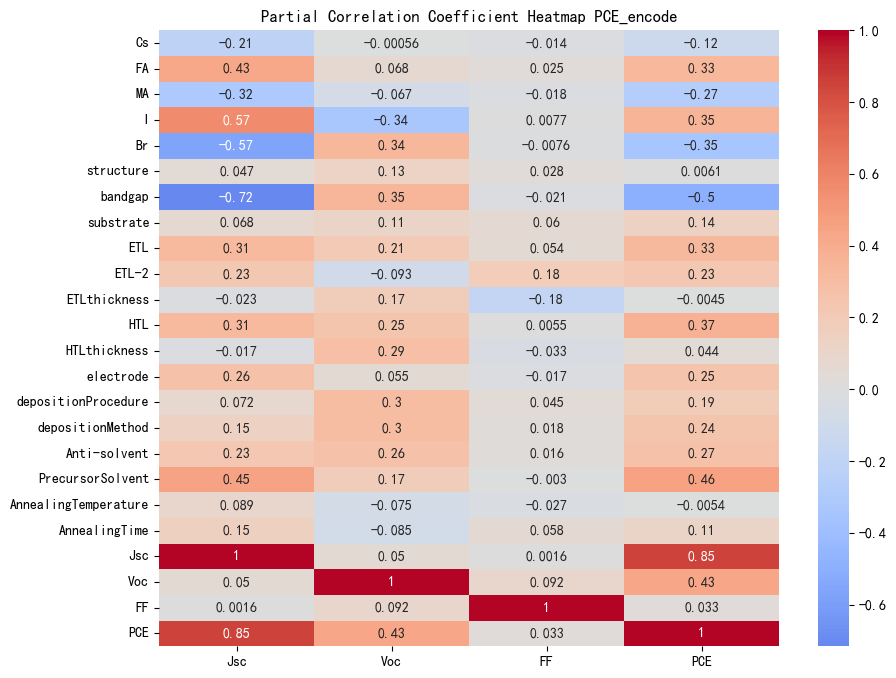

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# df=pd.read_csv("without_fill/encoded_PCE.csv")

df_pcorr = df_encoded_PCE.corr(method='pearson')
df_pcorr_last4 = df_pcorr.iloc[:, -4:]

plt.figure(figsize=(10, 8))
sns.heatmap(df_pcorr_last4, annot=True, cmap='coolwarm', center=0)
plt.title('Partial Correlation Coefficient Heatmap PCE_encode')
plt.show()

In [190]:

df_encoded_PCE['AnnealingTemperature'].corr(df_encoded_PCE['PCE'])



-0.0053525534971881165

In [194]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
df = df_encoded_PCE
X = df.drop('PCE', axis=1)  
y = df['PCE']  
imputer = SimpleImputer(strategy='mean')
X_filled = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df.sort_values(by='Importance', ascending=False, inplace=True)
print(features_df)
features_df.to_csv('feature_importances.csv', index=False)

                 Feature  Importance
20                   Jsc    0.703180
22                    FF    0.218576
21                   Voc    0.053075
2                     MA    0.002333
1                     FA    0.002182
0                     Cs    0.002116
6                bandgap    0.002088
3                      I    0.002035
8                    ETL    0.001971
11                   HTL    0.001882
4                     Br    0.001789
17      PrecursorSolvent    0.001475
19         AnnealingTime    0.001302
9                  ETL-2    0.001136
13             electrode    0.001073
15      depositionMethod    0.001008
18  AnnealingTemperature    0.000641
14   depositionProcedure    0.000586
16          Anti-solvent    0.000530
7              substrate    0.000484
5              structure    0.000241
10          ETLthickness    0.000156
12          HTLthickness    0.000140


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cs                    459 non-null    float64
 1   FA                    459 non-null    float64
 2   MA                    459 non-null    float64
 3   Pb                    459 non-null    float64
 4   I                     459 non-null    float64
 5   Br                    459 non-null    float64
 6   structure             459 non-null    int64  
 7   bandgap               459 non-null    object 
 8   substrate             459 non-null    object 
 9   ETL-1                 459 non-null    object 
 10  ETL-2                 233 non-null    object 
 11  HTL                   447 non-null    object 
 12  electrode             458 non-null    object 
 13  depositionProcedure   459 non-null    object 
 14  depositionMethod      459 non-null    object 
 15  Anti-solvent          3

### 小提琴图

In [22]:
import pandas as pd
df=pd.read_excel("datasets/TCP_datasets.xlsx")
df.columns

Index(['Cs', 'FA', 'MA', 'Pb', 'I', 'Br', 'structure', 'bandgap', 'substrate',
       'ETL-1', 'ETL-2', 'HTL', 'electrode', 'depositionProcedure',
       'depositionMethod', 'Anti-solvent', 'PrecursorSolvent',
       'AnnealingTemperature', 'AnnealingTime', 'Jsc', 'Voc', 'FF', 'PCE',
       'Article', 'Unnamed: 24'],
      dtype='object')

衬底小提琴图

In [23]:

df['substrate'].unique()

array(['FTO', 'ITO'], dtype=object)

In [27]:
df['PCE']=df['PCE'].astype("float64")

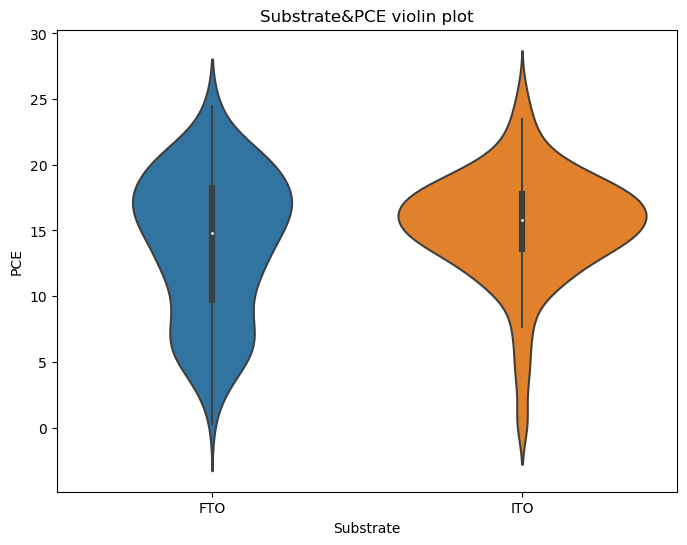

In [29]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.violinplot(x='substrate', y='PCE', data=df)
plt.xlabel('Substrate')
plt.ylabel('PCE')
plt.title('Substrate&PCE violin plot')
plt.show()

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the data
df = pd.read_csv("datasets/TCP_datasets.xlsx")

# Create the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(y='PCE', data=df[df['PCE'] > 0])
plt.xlabel('PCE')
plt.ylabel('')
plt.title('Positive PCE Violin Plot')
plt.show()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 16: invalid start byte

In [228]:
df=df.drop("Article",axis=1)
df=df.drop("Pb",axis=1)
df=df.drop("Perovskite",axis=1)

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

In [230]:
df.columns

Index(['Cs', 'FA', 'MA', 'I', 'Br', 'structure', 'bandgap', 'substrate', 'ETL',
       'ETL-2', 'ETLthickness', 'HTL', 'HTLthickness', 'electrode',
       'depositionProcedure', 'depositionMethod', 'Anti-solvent',
       'PrecursorSolvent', 'AnnealingTemperature', 'AnnealingTime', 'Jsc',
       'Voc', 'FF', 'PCE'],
      dtype='object')

### 退火时间的小提琴图

In [419]:
df=pd.read_excel("merge.xlsx")
df['merged']=df['AnnealingTime']
df['merged'].unique()

array([ 30.,  nan,  40.,  60.,  20.,  15.,   0.,   2.,   5.,  10.,  45.,
        50.,   3., 120.,  90.])

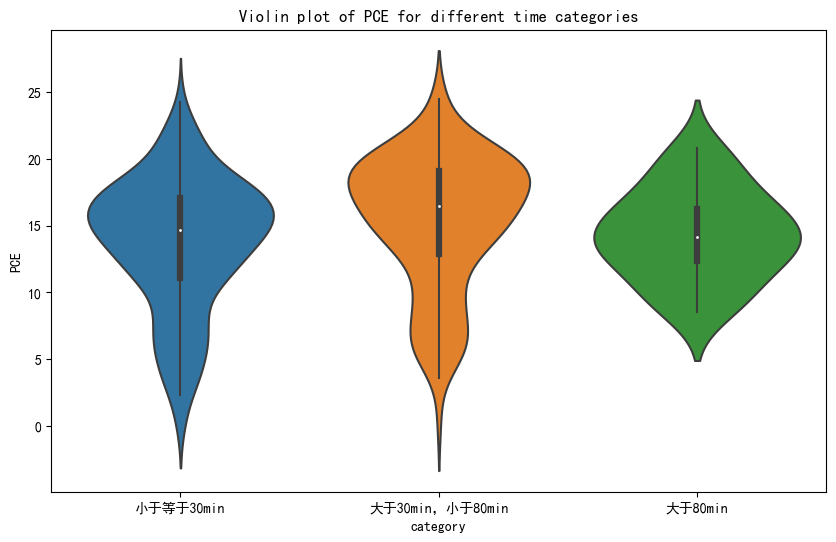

In [420]:
data=df
def categorize(value):
    if value <= 39:
        return "小于等于30min"
    elif 40 <= value <= 69:
        return "大于30min，小于80min"
    else:
        return "大于80min"

data['category'] = data['merged'].apply(categorize)

plt.figure(figsize=(10, 6))
sns.violinplot(x='category', y='PCE', data=data, order=["小于等于30min", "大于30min，小于80min", "大于80min"])
plt.title('Violin plot of PCE for different time categories')
plt.show()

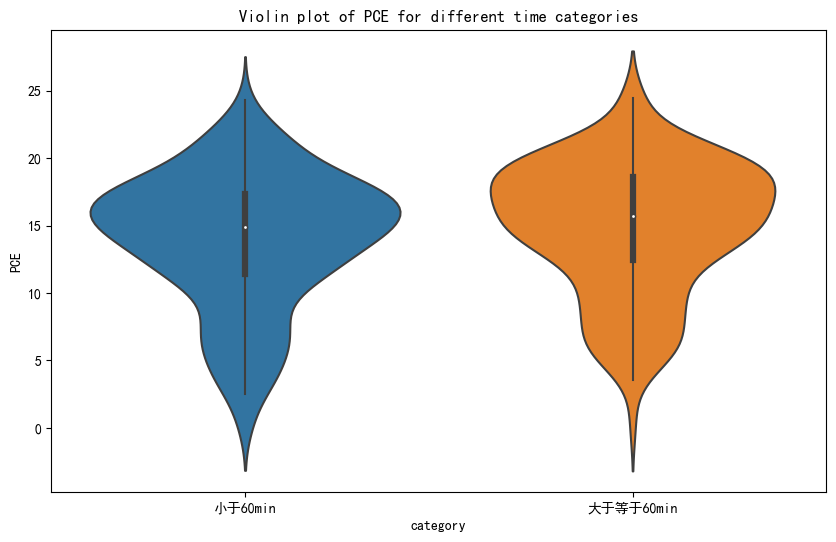

In [421]:
data=df
def categorize(value):
    if value < 60:
        return "小于60min"
    else:
        return "大于等于60min"

data['category'] = data['merged'].apply(categorize)

plt.figure(figsize=(10, 6))
sns.violinplot(x='category', y='PCE', data=data, order=["小于60min", "大于等于60min"])
plt.title('Violin plot of PCE for different time categories')
plt.show()

### 退火温度

In [417]:
df=pd.read_excel("merge.xlsx")
df['merged']=df['AnnealingTemperature']
df['merged'].unique()

array([100.,  nan, 115., 150., 120., 110., 130., 225.,  75., 140., 170.,
       185.])

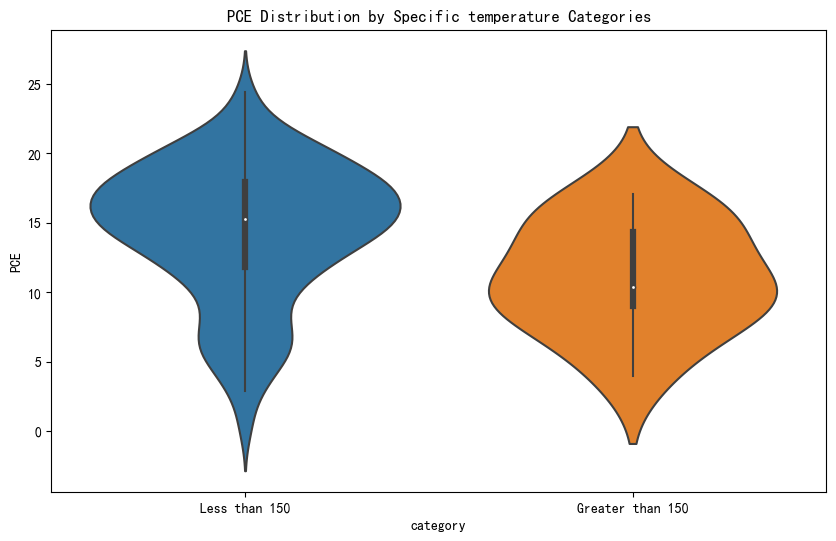

In [418]:

data = df

data['category'] = data['merged'].apply(lambda x: 'Greater than 150' if x > 150 else 'Less than 150')

plt.figure(figsize=(10, 6))
sns.violinplot(x='category', y='PCE', data=data)
plt.title('PCE Distribution by Specific temperature Categories')
plt.show()

### 反溶剂相对于PCE 的小提琴图

In [395]:
df=pd.read_excel("merge.xlsx")
df['merged']=df['Anti-solvent']
df['merged'].unique()

array([nan, 'CB', 'ANI ', 'hlorobenzene', 'toluene', 'tBuOH/EA', 'GP',
       'HEA', 'ANI', 'EA', 'EA/HEX', 'T', 'diethyl ether', 'BCl', 'BBr',
       'EA/0.1Hex', 'EA/0.2Hex', 'EA/0.3Hex', 'EA/0.4Hex', 'TL',
       'isopropanol '], dtype=object)

In [404]:
df['merged'].unique()

array([nan, 'CB', 'ANI ', 'toluene', 'tBuOH/EA', 'GP', 'HEA', 'ANI', 'EA',
       'EA/HEX', 'T', 'diethyl ether', 'BCl', 'BBr', 'TL', 'isopropanol '],
      dtype=object)

In [403]:
df['merged'] = df['merged'].replace('EA/Hex', 'EA/HEX')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11180\2237916173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['merged'] = filtered_df1['merged'].str.strip()


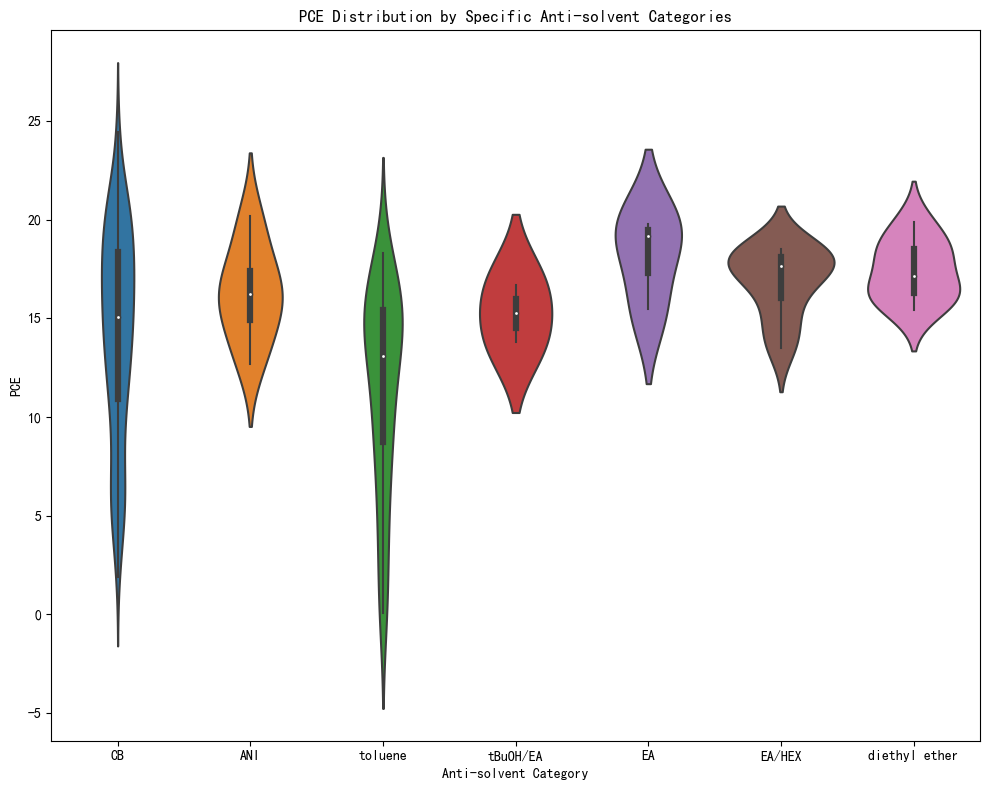

In [407]:
filtered_df1 = df[df['merged'].isin(['CB', 'ANI ', 'toluene', 'tBuOH/EA',  'ANI', 'EA',
       'EA/HEX',  'diethyl ether'])]

# 确保正确处理字符串前后的空格
filtered_df1['merged'] = filtered_df1['merged'].str.strip()

# 绘制小提琴图
plt.figure(figsize=(10, 8))
sns.violinplot(x='merged', y='PCE', data=filtered_df1)

plt.title('PCE Distribution by Specific Anti-solvent Categories')
plt.xlabel('Anti-solvent Category')
plt.ylabel('PCE')
plt.xticks(rotation=0) # 如果标签太长，可以旋转以便更好地展示

plt.tight_layout()
plt.show()

### electrode小提琴分布

In [408]:
df=pd.read_excel("merge.xlsx")
df['electrode'].unique()

array(['C', 'Cu', 'Ag', 'Pt', 'Au', 'BCP', nan, 'PEIE/Au', 'PEIE/Ag',
       'Ca/Al', 'Al', 'Ca/Ag'], dtype=object)

In [409]:
df['merged']=df['electrode']

In [413]:
df['merged'] = df['merged'].replace('Ca/Ag', 'Ag')


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11180\2527052037.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['merged'] = filtered_df1['merged'].str.strip()


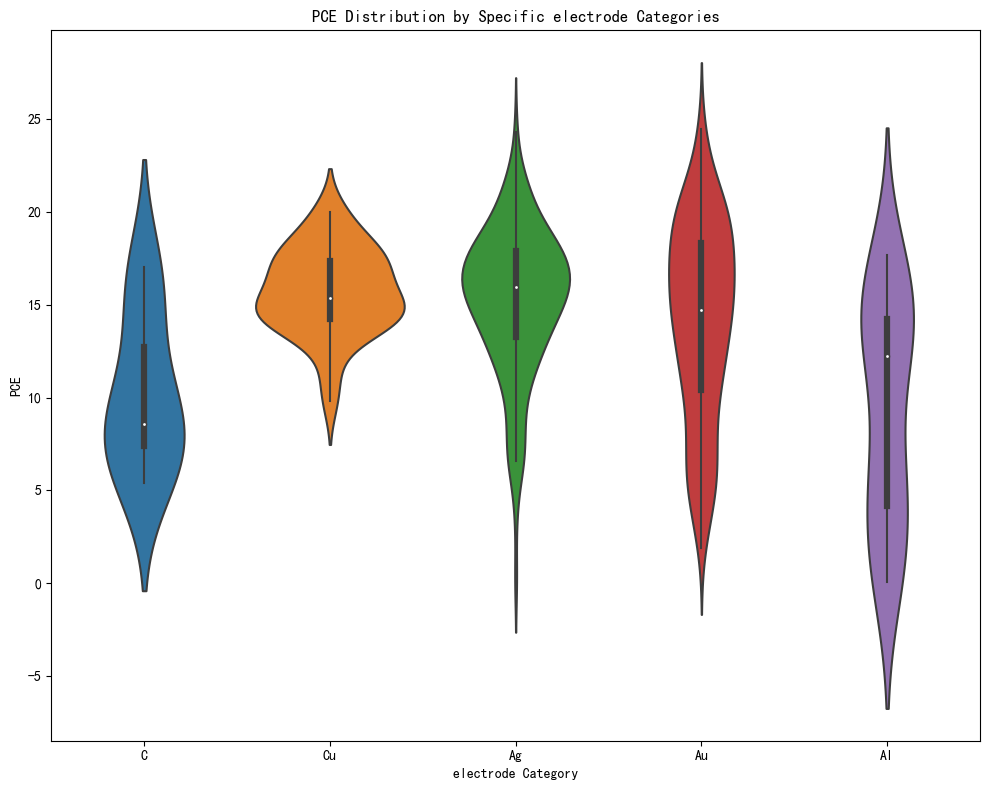

In [414]:
filtered_df1 = df[df['merged'].isin(['C', 'Cu', 'Ag', 'Au',  'Al' ])]

# 确保正确处理字符串前后的空格
filtered_df1['merged'] = filtered_df1['merged'].str.strip()

# 绘制小提琴图
plt.figure(figsize=(10, 8))
sns.violinplot(x='merged', y='PCE', data=filtered_df1)

plt.title('PCE Distribution by Specific electrode Categories')
plt.xlabel('electrode Category')
plt.ylabel('PCE')
plt.xticks(rotation=0) # 如果标签太长，可以旋转以便更好地展示

plt.tight_layout()
plt.show()

### HTL小提琴分布

In [316]:
df['HTL'].unique()

array(['spiro', 'CuSCN', 'PTAA', 'NiO', 'CuSbS2', 'BCP', 'P3HT', 'NiOx',
       'Meo2PACz SAM', 'spiro:tBP\u2006:\u2006LiTFSI\u2006:\u2006FK209',
       'spiro:tBP\u2006:\u2006LiTFSI', 'spiro:F4-TCNQ',
       'spiro:Dopant-free', 'PEDOT:PSS', 'NiOx/PTAA', nan,
       'TBTA[6]H/TBPHTFSI', 'PCBM/ZnO', 'SnS', 'spiro/EAI', 'spiro/IAI',
       'spiro/Gual', 'RCP–BTT', 'RCP–BTT/dopant', 'PTB7', 'PTB7/dopant',
       'D4TBP/spiro', '0.05PTAA', '0.1PTAA', '0.015PTAA', '0.033PTAA',
       '0.066PTAA', '0.015PTAA/PS', 'TPB', 'P3HT/MoO3',
       'PeRyLene/P3HT/MoO3', '2PeRyLene/P3HT/MoO3', '3PeRyLene/P3HT/MoO3',
       '4PeRyLene/P3HT/MoO3', '3TPFPB/spiro', '5TPFPB/spiro',
       '7TPFPB/spiro', 'ClS', 'MeO-2PACz', '2PACz', 'Me-2PACz',
       'Me-2PACz/MACl', 'MeO-4PACz', 'TaTm', 'ployTPD:F4-TCNQ',
       'ployTPD:PEDOT:PSS'], dtype=object)

In [383]:
df=pd.read_excel("merge.xlsx")
df = df.iloc[:, 26:]

df['merged'] = df['HTL']
df.to_excel("merge.xlsx",index=False)

In [378]:
df=pd.read_excel("merge.xlsx")
df['merged'] = df['merged'].replace('Me-2PACz/MACl', 'PACz')
df.to_excel("merge.xlsx",index=False)

In [379]:
df['merged'].unique()


array(['spiro', 'CuSCN', 'PTAA', 'NiOx', 'CuSbS2', 'P3HT', 'PACz',
       'PEDOT:PSS', 'NiOx/PTAA', nan, 'TBTA[6]H/TBPHTFSI', 'SnS',
       'RCP–BTT', 'PTB7', 'TPB', 'ClS', 'TaTm', 'ployTPD:F4-TCNQ',
       'ployTPD:PEDOT:PSS'], dtype=object)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11180\471844829.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['merged'] = filtered_df1['merged'].str.strip()


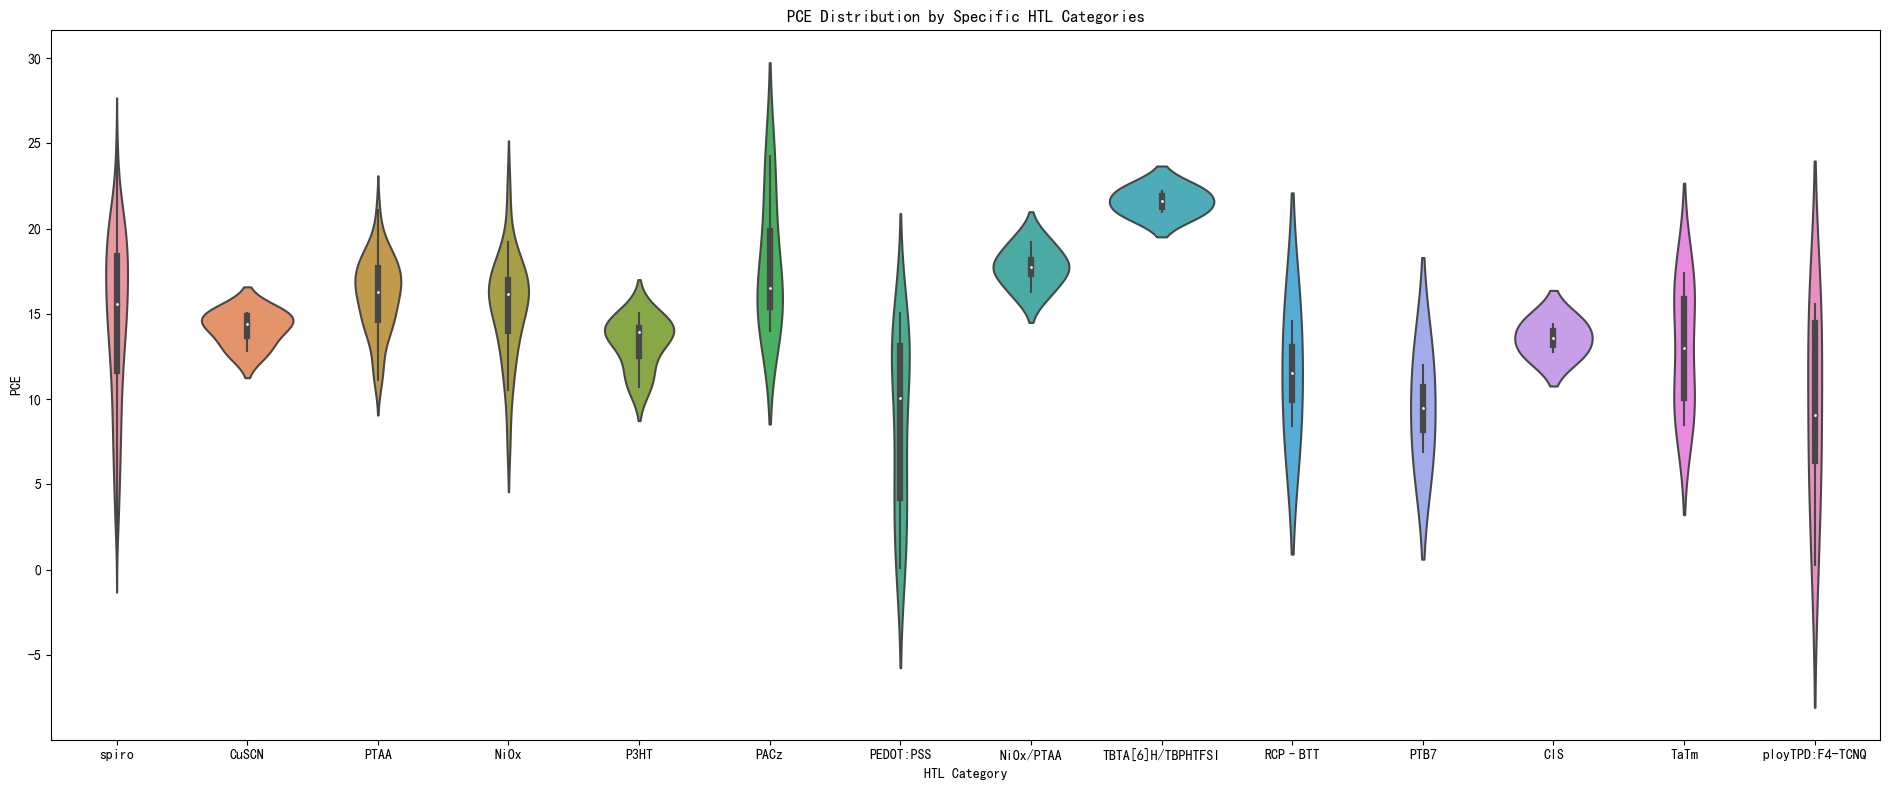

In [381]:
filtered_df1 = df[df['merged'].isin(['spiro', 'CuSCN', 'PTAA', 'NiOx', 'P3HT', 'PACz',
       'PEDOT:PSS', 'NiOx/PTAA', 'TBTA[6]H/TBPHTFSI',
       'RCP–BTT', 'PTB7', 'ClS', 'TaTm', 'ployTPD:F4-TCNQ'])]

filtered_df1['merged'] = filtered_df1['merged'].str.strip()

plt.figure(figsize=(19, 8))
sns.violinplot(x='merged', y='PCE', data=filtered_df1)

plt.title('PCE Distribution by Specific HTL Categories')
plt.xlabel('HTL Category')
plt.ylabel('PCE')
plt.xticks(rotation=0) 

plt.tight_layout()
plt.show()

In [32]:
df.head(3)

,Cs,FA,MA,Pb,I,Br,structure,bandgap,substrate,ETL-1,...,Anti-solvent,PrecursorSolvent,AnnealingTemperature,AnnealingTime,Jsc,Voc,FF,PCE,Article,Unnamed: 24
0,0.06,0.79,0.15,1.0,2.55,0.45,1,1.59,FTO,c-TiO2,...,CB,DMF/DMSO,100.0,60.0,22.6,1.05,0.73,17.30,"Abdi-Jalebi, M., Andaji-Garmaroudi, Z., Cacovi...",NaN
1,0.06,0.79,0.15,1.0,1.20,1.80,1,1.83,FTO,c-TiO2,...,CB,DMF/DMSO,100.0,60.0,15.3,1.12,0.72,12.30,"Abdi-Jalebi, M., Andaji-Garmaroudi, Z., Cacovi...",NaN
2,0.10,0.76,0.14,1.0,2.58,0.42,1,1.63,FTO,TiO2,...,CB,DMF/DMSO,100.0,60.0,23.18,1.07,0.783,19.01,"ABDULRAHIM S M, AHMAD Z, MEHMOOD M Q, et al. E...",NaN


### ETL小提琴分布

In [37]:
df['ETL-1'].unique()

array(['c-TiO2', 'TiO2', 'SnO2', 'ALD-TiO2', 'PCBM', 'ALD-SnO2',
       'Li-TiO2', 'BCP', 'PlanarTiO2', 'mpTiO2', 'ZnO2', 'C', 'bl-TiO2',
       'ZnO'], dtype=object)

In [36]:


data = df.copy()

data = data[data['ETL-1'].notnull()]

non_null_data = data[data['ETL-2'].notnull()]
null_data = data[data['ETL-2'].isnull()]

violin_data = pd.concat([
    pd.DataFrame({'PCE': non_null_data['PCE'].values, 'ETL category': ['ETL-2'] * len(non_null_data)}),
    pd.DataFrame({'PCE': null_data['PCE'].values, 'ETL category': ['ETL-1'] * len(null_data)})
], ignore_index=True)
violin_data.to_excel("ETL1andETL2.xlsx",index=False)

In [238]:


# 查看merged列中的唯一值
unique_values = data['ETL_combined'].unique()
print(unique_values)

['SnO2' 'TiO2' 'CBCP' 'TiO2Al2O3' 'NiOx' 'c-TiO2mp-TiO2' 'PCBMBCP'
 'c-TiO2' 'PCBM' 'ZnO' 'bl-TiO2mp-TiO2' 'BCP' 'PCBMZnO' 'SnO2-KClAl2O3'
 'TiO2Y-TiO2' 'BCPC60' 'c-TiO2SnO2' 'PlanarTiO2' '1%Nb–PlanarTiO2'
 '2%Nb–PlanarTiO2' '3%Nb–PlanarTiO2' '4%Nb–PlanarTiO2' '5%Nb–PlanarTiO2'
 'mpTiO2' '1%Nb–mpTiO2' '2%Nb–mpTiO2' '3%Nb–mpTiO2' '4%Nb–mpTiO2'
 '5%Nb–mpTiO2' 'SpinSnO2' 'SpraySnO2' 'BilayerSnO2' 'CsF/SnO2' 'SG-SnO2'
 'NP-SnO2' 'Bi-SnO2' 'ALD-SnO2' 'PCBMTiO2/BCP' 'ZnO2' 'C' 'ALD-TiO2'
 'ALD-TiO2mp-TiO2' 'Li-TiO2' 'SnO2PCBM' 'SnO2C' 'c-TiO2mp-TiO2/SnO2-NCs'
 'c-TiO2mp-TiO2/a-SnO2' 'C60' 'C60PCBM']


In [297]:
df=pd.read_excel("merge.xlsx")
df['ETL_combined'] = df['ETL_combined'].replace('5%Nb–mpTiO2', 'mpTiO2')

In [302]:
df['ETL_combined'].unique()

array(['SnO2', 'TiO2', 'CBCP', 'TiO2Al2O3', 'BCP', 'CTiO2', 'PCBMBCP',
       'PCBM', 'ZnO', 'PCBMZnO', 'SnO2Al2O3', 'TiO2SnO2', 'C', 'SnO2PCBM',
       'SnO2C', 'C60PCBM'], dtype=object)

In [314]:
# PCBM PCBMBCP PCBMZnO SnO2PCBM C60PCBM
# BCP CBCP  PCBMBCP
# SnO2 TiO2 C ZnO CTiO2 TiO2SnO2 SnO2C SnO2Al2O3

df=pd.read_excel("merge.xlsx")
df['ETL_combined'] = df['ETL_combined'].replace('SnO2PCBM', 'SnO2')
df.to_excel("merge.xlsx")

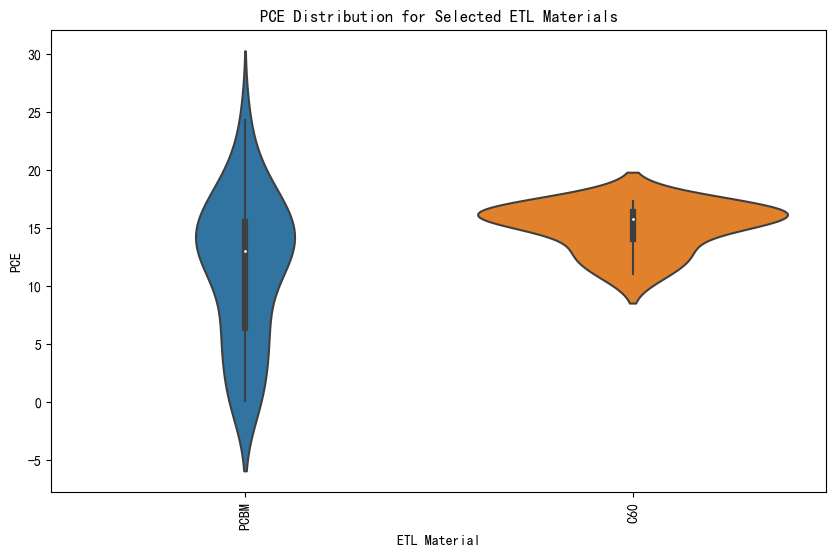

In [315]:

etl_materials = ["PCBM", "PCBMBCP", "PCBMZnO", "SnO2PCBM", "C60PCBM"]

# 筛选出感兴趣的ETL材料数据
data=df
filtered_data = data[data['ETL_combined'].isin(etl_materials)]

# 绘制小提琴图
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(x='merged', y='PCE', data=filtered_data, ax=ax)
ax.set_xlabel('ETL Material')
ax.set_ylabel('PCE')
ax.set_title('PCE Distribution for Selected ETL Materials')
plt.xticks(rotation=90)
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11180\3664288644.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['ETL_combined'] = filtered_df['ETL_combined'].str.strip()


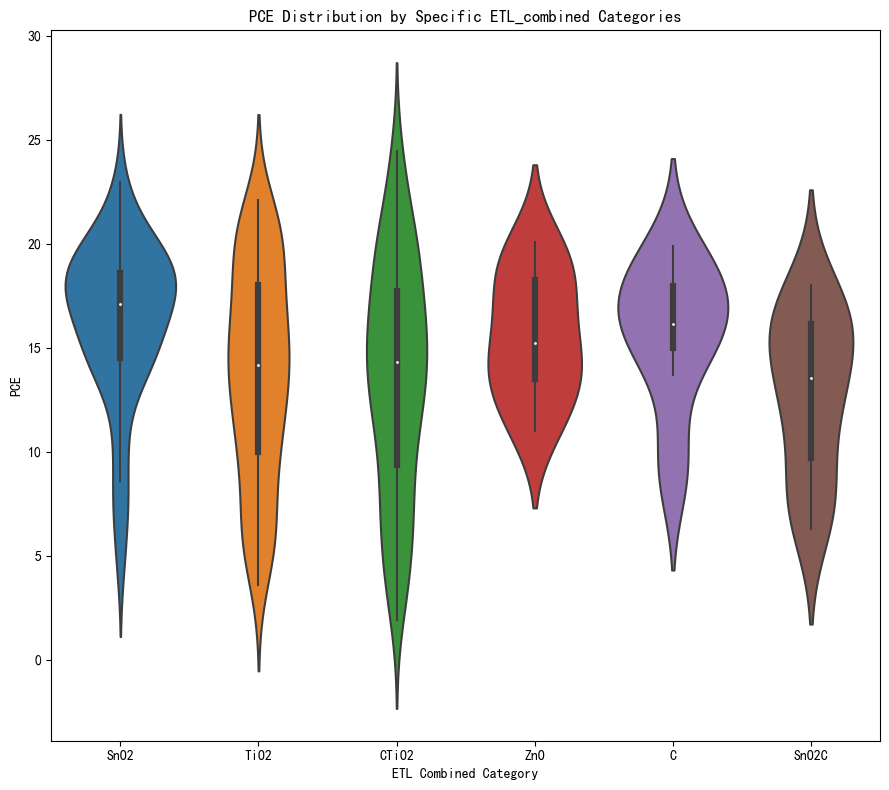

In [312]:

filtered_df = df[df['ETL_combined'].isin(["SnO2","TiO2","C","ZnO","CTiO2","TiO2SnO2","SnO2C","SnO2Al2O3"])]

# 确保正确处理字符串前后的空格
filtered_df['ETL_combined'] = filtered_df['ETL_combined'].str.strip()

# 绘制小提琴图
plt.figure(figsize=(9, 8))
sns.violinplot(x='ETL_combined', y='PCE', data=filtered_df)

plt.title('PCE Distribution by Specific ETL_combined Categories')
plt.xlabel('ETL Combined Category')
plt.ylabel('PCE')
plt.xticks(rotation=0) # 如果标签太长，可以旋转以便更好地展示

plt.tight_layout()
plt.show()

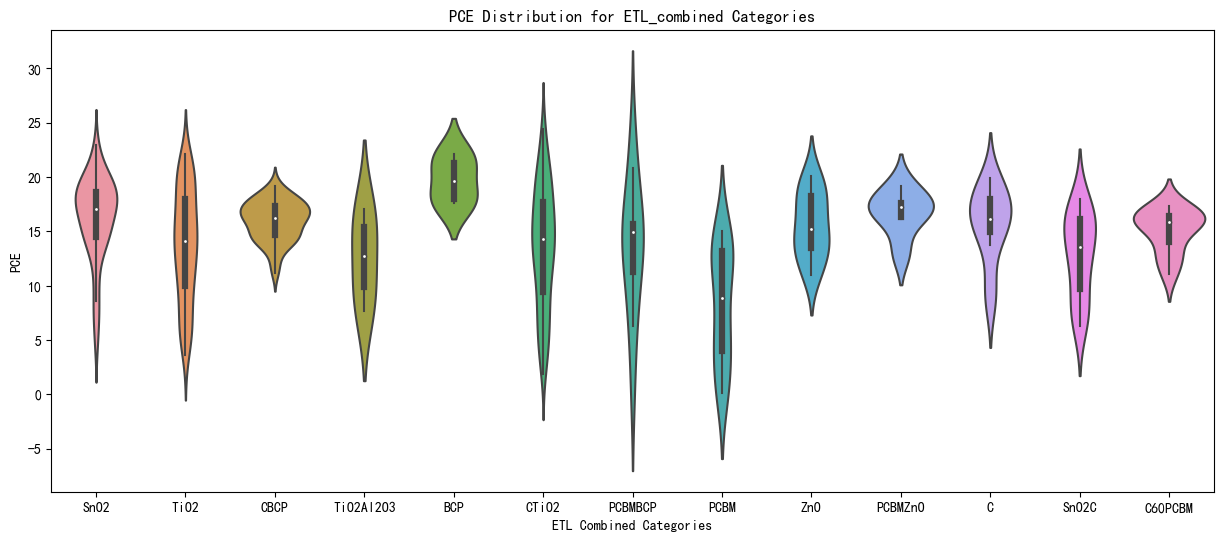

In [307]:

plt.figure(figsize=(15, 6))
sns.violinplot(x='ETL_combined', y='PCE', data=df)

plt.title('PCE Distribution for ETL_combined Categories')
plt.xlabel('ETL Combined Categories')
plt.ylabel('PCE')

# 显示图形
plt.show()

In [38]:


df['ETL'] = df['ETL-1'].astype(str) + '/' + df['ETL-2'].astype(str)
df['ETL'] = df['ETL'].str.replace('/nan', '')
df['ETL'].unique()

array(['c-TiO2/mp-TiO2', 'TiO2', 'SnO2', 'ALD-TiO2/mp-TiO2', 'ALD-TiO2',
       'c-TiO2', 'PCBM/BCP', 'SnO2/C', 'ALD-SnO2', 'SnO2/PCBM',
       'c-TiO2/SnO2', 'TiO2/Y-TiO2', 'TiO2/Al2O3', 'c-TiO2/mp-TiO2/SnO2',
       'Li-TiO2', 'BCP/C', 'PCBM', 'PlanarTiO2', 'mpTiO2',
       'PCBM/TiO2/BCP', 'BCP', 'ZnO2', 'C', 'PCBM/ZnO', 'bl-TiO2/mp-TiO2',
       'C/BCP', 'SnO2/Al2O3', 'C/PCBM', 'ZnO'], dtype=object)

In [41]:
df['ETL']=df['ETL'].replace("ZnO",'ZnO2')
df['ETL']=df['ETL'].replace("c-TiO2",'TiO2')
df['ETL']=df['ETL'].replace("Li-TiO2",'TiO2')
df['ETL']=df['ETL'].replace("mpTiO2",'TiO2')
df['ETL']=df['ETL'].replace("ALD-TiO2",'TiO2')

In [42]:
df['ETL']=df['ETL'].replace("C/BCP",'BCP/C')

In [46]:

E1=['BCP','TiO2', 'SnO2','ZnO2','PCBM']
E2=['c-TiO2/mp-TiO2', 'ALD-TiO2/mp-TiO2','PCBM/BCP','SnO2/C','SnO2/PCBM', 'c-TiO2/SnO2', 'TiO2/Y-TiO2', 'TiO2/Al2O3', 'c-TiO2/mp-TiO2/SnO2','BCP/C','PCBM/TiO2/BCP','PCBM/ZnO', 'bl-TiO2/mp-TiO2', 'SnO2/Al2O3', 'C/PCBM']

In [49]:

df_filtered = df[df['ETL'].isin(E2)]
# ax = sns.violinplot(x="ETL", y="PCE", data=df_filtered)
df_filtered.to_excel("shuang_geETL.xlsx",index=False)
# plt.title('PCE Distribution by ETL Material')
# plt.xlabel('ETL Material')
# plt.ylabel('PCE')
# fig = plt.gcf()
# fig.set_size_inches(10, 6)
# plt.show()

In [50]:
df['HTL'].unique()

array(['spiro', 'D4TBP/spiro', 'spiro/Gual', 'MeO-4PACz', 'PTAA', 'NiOx',
       'ployTPD:F4-TCNQ', 'CuSbS2', 'TBTA[6]H/TBPHTFSI', 'SnS',
       'spiro:tBP\u2006:\u2006LiTFSI\u2006:\u2006FK209',
       'spiro:tBP\u2006:\u2006LiTFSI', 'spiro:F4-TCNQ', 'NiO',
       'RCP–BTT/dopant', 'PTB7/dopant', 'RCP–BTT', 'PTB7', 'TPB',
       'PEDOT:PSS', nan, 'TaTm', '5TPFPB/spiro', '7TPFPB/spiro',
       '3TPFPB/spiro', 'P3HT', 'NiOx/PTAA', 'PeRyLene/P3HT/MoO3',
       'P3HT/MoO3', 'ClS', '2PACz', 'CuSCN'], dtype=object)

有机HTL材料:
['spiro', 'D4TBP/spiro', 'spiro/Gual', 'MeO-4PACz', 'PTAA', 'ployTPD:F4-TCNQ', 'TBTA[6]H/TBPHTFSI', 'spiro:tBP\u2006:\u2006LiTFSI\u2006:\u2006FK209', 'spiro:tBP\u2006:\u2006LiTFSI', 'spiro:F4-TCNQ', 'RCP–BTT/dopant', 'PTB7/dopant', 'RCP–BTT', 'PTB7', 'TPB', 'PEDOT:PSS', 'TaTm', '2PACz']

无机HTL材料:
['NiOx', 'CuSbS2', 'SnS', 'NiO', 'ClS', 'CuSCN']

有机无机复合HTL材料:
['5TPFPB/spiro', '7TPFPB/spiro', '3TPFPB/spiro', 'NiOx/PTAA', 'PeRyLene/P3HT/MoO3', 'P3HT/MoO3']

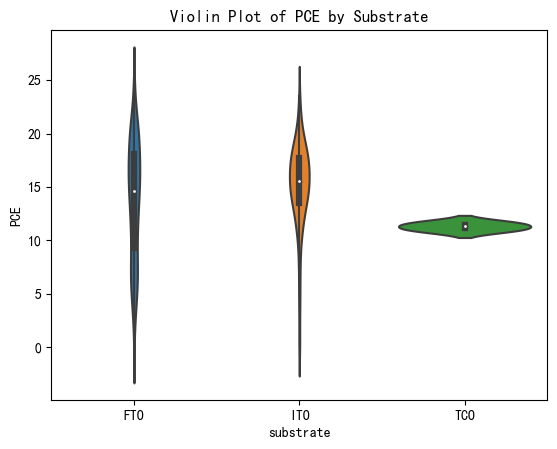

In [225]:
df['substrate'] = df['substrate'].replace(['Quartz/ITO', 'PEN/ITO'], 'ITO')

sns.violinplot(x='substrate', y='PCE', data=df)

plt.title('Violin Plot of PCE by Substrate')

plt.xticks(rotation=0)

plt.show()

In [221]:
df1=pd.read_excel("datasets/test_bandgap_Voc.xlsx")

df1 = df1.dropna(subset=['bandgap', 'PCE'], how='any')
df1['bandgap']=df1['bandgap'].astype('float64')

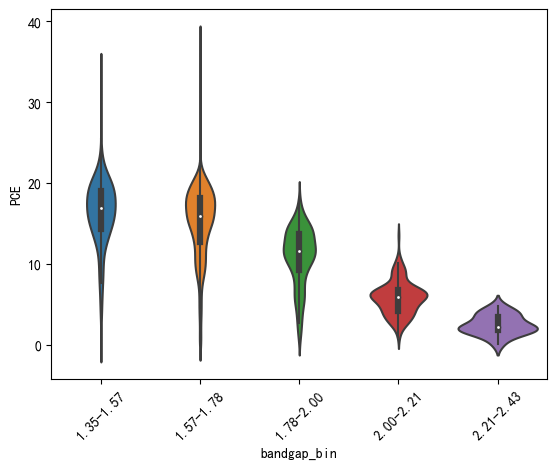

In [222]:

bandgap_min = df1['bandgap'].min()
bandgap_max = df1['bandgap'].max()
bins = np.linspace(bandgap_min, bandgap_max, 6)
labels = [f"{bins[i]:.2f}-{bins[i+1]:.2f}" for i in range(len(bins)-1)]
df1['bandgap_bin'] = pd.cut(df1['bandgap'], bins=bins, labels=labels, include_lowest=True)

sns.violinplot(x="bandgap_bin", y="PCE", data=df1)
plt.xticks(rotation=45)
plt.show()

In [437]:
data=pd.read_excel("datasets\\test_bandgap_Voc.xlsx")
data['FF1']=data['FF1'].astype("float64")
data['PCE1']=data['PCE1'].astype("float64")

### 重新整理数据

In [33]:
import pandas as pd


In [34]:
df=pd.read_excel("datasets/datasets.xlsx")
df.shape

(538, 25)

In [35]:
df.columns

Index(['Cs', 'FA', 'MA', 'Pb', 'I', 'Br', 'structure', 'bandgap', 'substrate',
       'ETL-1', 'ETL-2', 'HTL', 'electrode', 'depositionProcedure',
       'depositionMethod', 'Anti-solvent', 'PrecursorSolvent',
       'AnnealingTemperature', 'AnnealingTime', 'Jsc', 'Voc', 'FF', 'PCE',
       'Article', 'Unnamed: 24'],
      dtype='object')

In [36]:
df=df.drop("MA",axis=1)
df=df.drop("Unnamed: 24",axis=1)
df=df.drop("Br",axis=1)
df=df.drop("Article",axis=1)
df.to_excel("datasets/TCP_data.xlsx",index=False)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cs                    538 non-null    float64
 1   FA                    538 non-null    float64
 2   Pb                    538 non-null    float64
 3   I                     538 non-null    float64
 4   structure             538 non-null    int64  
 5   bandgap               538 non-null    object 
 6   substrate             538 non-null    object 
 7   ETL-1                 538 non-null    object 
 8   ETL-2                 301 non-null    object 
 9   HTL                   526 non-null    object 
 10  electrode             537 non-null    object 
 11  depositionProcedure   538 non-null    object 
 12  depositionMethod      538 non-null    object 
 13  Anti-solvent          410 non-null    object 
 14  PrecursorSolvent      530 non-null    object 
 15  AnnealingTemperature  5

In [38]:
df['bandgap']=df['bandgap'].astype("float64")
df['Jsc']=df['Jsc'].astype("float64")
df['Voc']=df['Voc'].astype("float64")
df['FF']=df['FF'].astype("float64")
df['PCE']=df['PCE'].astype("float64")
df.to_excel("datasets/TCP_data.xlsx",index=False)

In [11]:
df.columns

Index(['Cs', 'FA', 'Pb', 'I', 'structure', 'bandgap', 'substrate', 'ETL-1',
       'ETL-2', 'HTL', 'electrode', 'depositionProcedure', 'depositionMethod',
       'Anti-solvent', 'PrecursorSolvent', 'AnnealingTemperature',
       'AnnealingTime', 'Jsc', 'Voc', 'FF', 'PCE'],
      dtype='object')

In [12]:
df['depositionProcedure'].unique()

array(['three-step', 'one-step', 'two-step'], dtype=object)

In [13]:
df['depositionMethod'].unique()

array(['CAGQ', 'coat', 'Inkjet-Printed', 'R2R', 'spin',
       'Vacuum Deposited'], dtype=object)

### 沉积方法和沉积程序分布

In [ ]:
df_filtered = df[df['ETL'].isin(E2)]
# ax = sns.violinplot(x="ETL", y="PCE", data=df_filtered)
df_filtered.to_excel("shuang_geETL.xlsx",index=False)

In [39]:

df['Anti-solvent'].unique()

array([nan, 'CB', 'BBr', 'BCl', 'tBuOH/EA', 'EA', 'isopropanol ',
       'diethyl ether', 'GP', 'ANI', 'HEA', 'toluene', 'EA/HEX', 'TL',
       'T', 'EA/Hex', 'anisole', 'anisole\xa0', 'chloroform '],
      dtype=object)

In [40]:
data=df
data['Anti-solvent']=data['Anti-solvent'].replace('isopropanol ','isopropanol')
data['Anti-solvent']=data['Anti-solvent'].replace('chloroform ','CF')
data['Anti-solvent']=data['Anti-solvent'].replace('EA/Hex','EA/HEX')
data['Anti-solvent']=data['Anti-solvent'].replace('TL','toluene')
data['Anti-solvent']=data['Anti-solvent'].replace('anisole','ANI')
data['Anti-solvent']=data['Anti-solvent'].replace('anisole\xa0','ANI')
data['Anti-solvent']=data['Anti-solvent'].replace('T','toluene')
data.to_excel("datasets/TCP_data.xlsx",index=False)

In [42]:
data['Anti-solvent'].unique()

array(['unused', 'CB', 'BBr', 'BCl', 'tBuOH/EA', 'EA', 'isopropanol',
       'diethyl ether', 'GP', 'ANI', 'HEA', 'toluene', 'EA/HEX', 'CF'],
      dtype=object)

In [41]:
data=data.fillna("unused")
data.to_excel("datasets/temp.xlsx",index=False)

In [31]:
data.to_excel("datasets/TCP_data.xlsx",index=False)

In [32]:
data1=pd.read_excel("datasets/TCP_data.xlsx")
data1['Anti-solvent'].unique()

array(['unused', 'CB', 'BBr', 'BCl', 'tBuOH/EA', 'EA', 'isopropanol',
       'diethyl ether', 'GP', 'ANI', 'HEA', 'toluene', 'EA/HEX', 'CF'],
      dtype=object)

### 偏相关系数矩阵计算

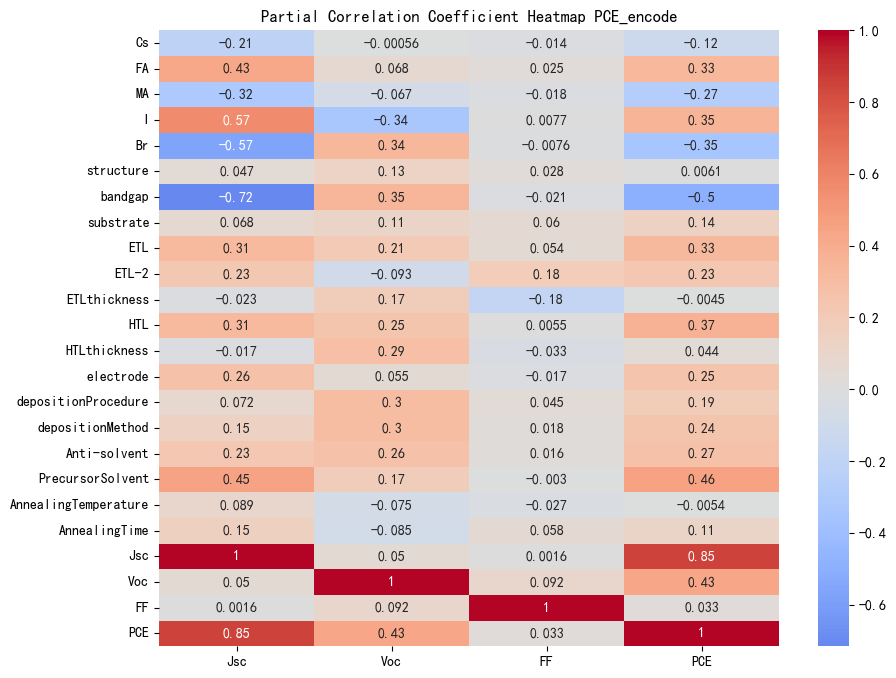

In [450]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

df=pd.read_excel("without_fill/encoded_PCE.xlsx")

df_pcorr = df_encoded_PCE.corr(method='pearson')
df_pcorr_last4 = df_pcorr.iloc[:, -4:]

plt.figure(figsize=(10, 8))
sns.heatmap(df_pcorr_last4, annot=True, cmap='coolwarm', center=0)
plt.title('Partial Correlation Coefficient Heatmap PCE_encode')
plt.show()

In [452]:
df['Voc'].corr(df['bandgap'])

0.34793579757956006

In [455]:
df['Jsc']=df['Jsc'].astype("float64")
df.to_excel("without_fill/encoded_PCE.xlsx",index=False)

In [471]:

df=pd.read_excel("without_fill/encoded_PCE.xlsx")
df.columns

Index(['Cs', 'FA', 'MA', 'I', 'Br', 'structure', 'bandgap', 'substrate', 'ETL',
       'ETL-2', 'ETLthickness', 'HTL', 'HTLthickness', 'electrode',
       'depositionProcedure', 'depositionMethod', 'Anti-solvent',
       'PrecursorSolvent', 'AnnealingTemperature', 'AnnealingTime', 'Jsc',
       'Voc', 'FF', 'PCE'],
      dtype='object')

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_excel('without_fill/encoded_PCE.xlsx')

In [10]:
df.columns

Index(['Cs', 'FA', 'MA', 'I', 'Br', 'structure', 'bandgap', 'substrate',
       'ETL-1', 'ETL-2', 'ETLthickness', 'HTL', 'HTLthickness', 'electrode',
       'depositionProcedure', 'depositionMethod', 'Anti-solvent',
       'PrecursorSolvent', 'AnnealingTemperature', 'AnnealingTime', 'Jsc',
       'Voc', 'FF', 'PCE'],
      dtype='object')

In [12]:
corr_matrix = df[['Cs', 'FA', 'MA', 'I', 'Br', 'structure', 'bandgap', 'substrate', 'ETL-1',
       'ETL-2', 'HTL',  'electrode',
       'depositionProcedure', 'depositionMethod', 'Anti-solvent',
       'PrecursorSolvent', 'AnnealingTemperature', 'AnnealingTime', 'Jsc',
       'Voc', 'FF', 'PCE']].corr(method='pearson')



In [13]:
corr_matrix

,Cs,FA,MA,I,Br,structure,bandgap,substrate,ETL-1,ETL-2,...,depositionProcedure,depositionMethod,Anti-solvent,PrecursorSolvent,AnnealingTemperature,AnnealingTime,Jsc,Voc,FF,PCE
Cs,1.000000,-0.193906,-0.264648,0.060966,-0.060963,-0.178514,-0.015480,0.081546,-0.145890,0.140208,...,-0.103852,0.059520,-0.182299,-0.239656,0.249329,-0.119598,-0.219275,-0.000561,-0.047013,-0.125332
FA,-0.193906,1.000000,-0.894280,0.141367,-0.138721,0.152113,-0.107245,-0.037608,0.296097,0.109611,...,0.002033,0.066525,0.443998,0.357300,0.141130,0.161867,0.435726,0.067697,-0.056240,0.337949
MA,-0.264648,-0.894280,1.000000,-0.166389,0.163784,-0.068628,0.110066,-0.002064,-0.226687,-0.150972,...,0.044418,-0.092504,-0.359036,-0.245107,-0.252605,-0.108613,-0.328431,-0.067287,0.075780,-0.276159
I,0.060966,0.141367,-0.166389,1.000000,-0.999547,-0.050042,-0.836511,0.074409,0.049926,0.155454,...,-0.173480,-0.013575,-0.071397,0.039655,0.189674,0.073910,0.580516,-0.335220,-0.009746,0.354757
Br,-0.060963,-0.138721,0.163784,-0.999547,1.000000,0.050128,0.835472,-0.074809,-0.050869,-0.156038,...,0.177727,0.018152,0.071759,-0.039157,-0.189751,-0.070890,-0.577299,0.337894,0.014680,-0.350607
structure,-0.178514,0.152113,-0.068628,-0.050042,0.050128,1.000000,0.171454,-0.508218,0.084062,-0.861141,...,0.203170,0.007761,0.336351,0.055916,0.162979,0.216147,0.052160,0.130884,-0.133232,0.011355
bandgap,-0.015480,-0.107245,0.110066,-0.836511,0.835472,0.171454,1.000000,-0.192715,-0.143276,-0.367209,...,0.247843,0.108316,0.298407,0.007729,-0.216174,-0.025568,-0.734654,0.347936,0.001782,-0.507604
substrate,0.081546,-0.037608,-0.002064,0.074409,-0.074809,-0.508218,-0.192715,1.000000,0.373871,0.802492,...,-0.041224,0.003389,-0.107604,-0.044361,-0.037247,-0.467840,0.067870,0.114695,0.176282,0.140439
ETL-1,-0.145890,0.296097,-0.226687,0.049926,-0.050869,0.084062,-0.143276,0.373871,1.000000,0.492736,...,0.042176,-0.025526,0.276562,0.319318,0.004618,-0.029403,0.314809,0.207629,0.158893,0.327090
ETL-2,0.140208,0.109611,-0.150972,0.155454,-0.156038,-0.861141,-0.367209,0.802492,0.492736,1.000000,...,-0.292908,-0.023789,-0.284636,0.313139,-0.053856,-0.322668,0.225671,-0.092576,0.184742,0.232443


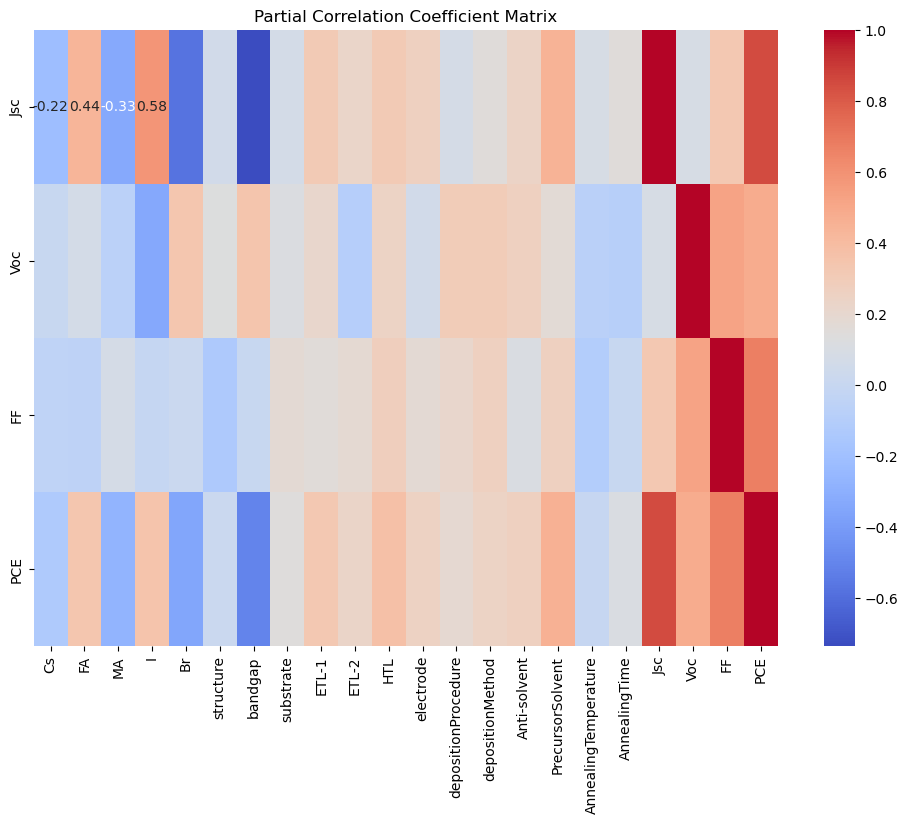

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[-4:], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Partial Correlation Coefficient Matrix')
plt.show()

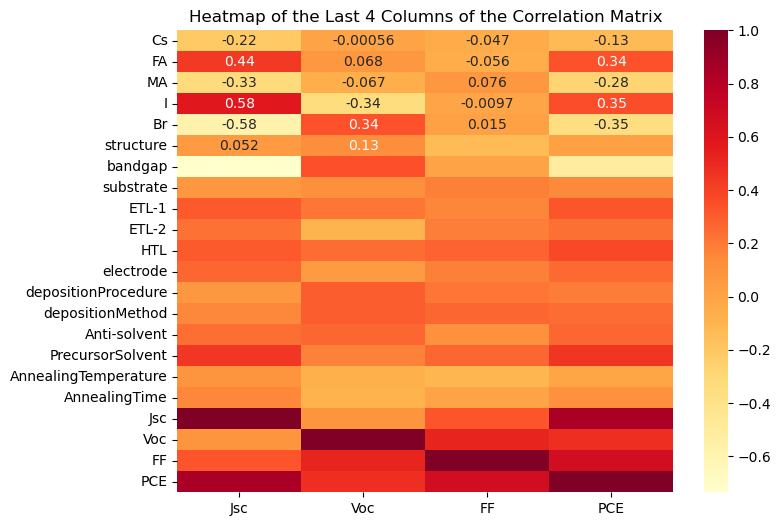

In [17]:
# 选择矩阵的最后4列
last_4_cols = corr_matrix.iloc[:, -4:]

# 绘制热图
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[-4:].T, annot=True, cmap='YlOrRd')
plt.title('Heatmap of the Last 4 Columns of the Correlation Matrix')
plt.show()